In [38]:
import pandas as pd
import os

# Load your data
#r'C:/Users/gusta/Documents/KTH/TriOptima/trioptima/trioptima/'
#'/Users/elliotlindestam/Documents/Skola/Indek icloud/trioptima/'
your_path = r'C:/Users/gusta/Documents/KTH/TriOptima/trioptima/trioptima/'
test_folder_path = your_path + '6.Active Data/2023/Test Data/'
train_folder_path = your_path + '6.Active Data/2023/Train Data/'

def clean_train(folder_path):
    try:
        # Get file in the folder
        files = os.listdir(folder_path)
        #MAC Issue
        files = [f for f in files if f != '.DS_Store']
        file = files[0]
        file_name = files[0][:-4]
        
        # Check if there are any files
        if len(files) == 0:
            print("No files found in the folder.")

        else:
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path, dtype=str)
            print(file)
            
    except Exception as e:
        print(f"An error occurred: {e}")

    # Drop 'disseminationTimestamp' and its derived columns
    data = data.drop(columns=['disseminationTimestamp','sDRreceiptTimestamp','disseminationIdentifier', 'eventDateTime'])

    # Convert any empty strings to NaN
    data = data.map(lambda x: None if x == '' else x)

    # Collect removed columns and percentages
    removed_columns = []
    nan_percentages = []

    # Identify columns to be removed and collect their names and NaN percentages
    for column in data.columns:
        nan_count = data[column].isna().sum()
        nan_percentage = nan_count / len(data)
        
        if nan_percentage >= 0.3:
            removed_columns.append(column)
            nan_percentages.append(f"{nan_percentage:.2%}")

    # Display removed columns and percentages in a table
    removed_data = pd.DataFrame({
        'Removed Column': removed_columns,
        '% NaN Values': nan_percentages
    })
    print("Removed Columns:")
    
    # Create Interaction variables
    data['CurrencyIV'] = data.apply(lambda row: compare_item(row, 'leg1NotionalCurrency','leg2NotionalCurrency'), axis=1)
    data['NominalIV'] = data.apply(lambda row: compare_item(row, 'leg1NotionalAmount','leg2NotionalAmount'), axis=1)
    
        # Define the non-numeric values for each column
    non_numeric_values_leg1 = ['QTR', '6D']
    non_numeric_values_leg2 = ['ZC', 'QTR', '6WK', 'SA']

    # Identify rows with non-numeric values in either of the two columns
    non_numeric_rows = data[
        data['leg1FixedRatePaymentFrequencyMultiplier'].isin(non_numeric_values_leg1) |
        data['leg2UnderlierTenorMultiplier'].isin(non_numeric_values_leg2)
    ]

    # Remove these rows from the DataFrame
    data = data.drop(non_numeric_rows.index)
    data = data.dropna(subset=['leg1FixedRatePaymentFrequencyPeriod','leg2UnderlierTenorPeriod'
                               ,'leg1FixedRatePaymentFrequencyMultiplier', 'leg2UnderlierTenorMultiplier',
                               'leg2UnderlierID'])

    # Remove identified columns
    data = data.drop(columns=removed_columns)

    # Display remaining columns
    remaining_columns = list(data.columns)
    print("\nRemaining Columns:")
    print(remaining_columns)

    # Display the number of remaining columns
    print(f"\nNumber of Remaining Columns in Train Data: {len(remaining_columns)}")
    print(f"\nRemaining Columns in Test Data: {data.columns}")
    print(f"\nNumber of Data Points in Train Data: {len(data)}")
    print("\nRemoved Columns:")
    print(removed_columns)

    # Write cleaned data back to CSV
    # Replace 'cleaned_file.csv' with the desired name/path for your output file
    cleaned_file_path = your_path + "2.Cleaned/" + file_name + '_Cleaned.csv'
    data.to_csv(cleaned_file_path, index=False)
    return removed_columns

def compare_item(row,leg1,leg2):
    return 1 if row[leg1] == row[leg2] else 0

def clean_test(fp, r_col):
    
    try:
        # Get file in the folder
        files = os.listdir(fp)
        files = [f for f in files if f != '.DS_Store']
        file = files[0]
        file_name = files[0][:-4]
        
        # Check if there are any files
        if len(files) == 0:
            print("No files found in the folder.")

        else:
            file_path = os.path.join(fp, file)
            data = pd.read_csv(file_path, dtype=str)
            print(file)
            
    except Exception as e:
        print(f"An error occurred: {e}")
    
    data = data.drop(columns=['disseminationTimestamp','sDRreceiptTimestamp','disseminationIdentifier', 'eventDateTime'])
    data = data.drop(columns=r_col)

    # Convert any empty strings to NaN
    data = data.map(lambda x: None if x == '' else x)

    # Create interaction variable
    data['CurrencyIV'] = data.apply(lambda row: compare_item(row, 'leg1NotionalCurrency','leg2NotionalCurrency'), axis=1)
    data['NominalIV'] = data.apply(lambda row: compare_item(row, 'leg1NotionalAmount','leg2NotionalAmount'), axis=1)

    print(f"\nNumber of Remaining Columns in Test Data: {len(data.columns)}")
    #print(data.columns)
    print(f"\nNumber of Data Points in Test Data: {len(data)}")
    cleaned_file_path = your_path + "2.Cleaned/" + file_name + '_Cleaned.csv'
    data.to_csv(cleaned_file_path, index=False)
    
    

removed_cols = clean_train(train_folder_path)
clean_test(test_folder_path,removed_cols)


IRS_2023_Train.csv
Removed Columns:

Remaining Columns:
['action', 'assetClass', 'cleared', 'customBasketIndicator', 'deliveryType', 'effectiveDate', 'event', 'executionDateTime', 'expirationDate', 'instrumentType', 'leg1FixedRateDayCount', 'leg1FloatingRateDayCount', 'leg1NotionalAmount', 'leg1NotionalCurrency', 'leg1NotionalScheduleType', 'leg1SettlementCurrency', 'leg1UnderlyingAssetOrContractType', 'leg2FloatingRateDayCount', 'leg2NotionalAmount', 'leg2NotionalCurrency', 'leg2NotionalScheduleType', 'leg2ResetFrequencyMultiplier', 'leg2SettlementCurrency', 'nonStandardTermIndicator', 'packageIndicator', 'platformID', 'postPricedSwapIndicator', 'primeBrokerageTransactionIndicator', 'productName', 'leg1FixedRate', 'leg1FixedRatePaymentFrequencyMultiplier', 'leg1FixedRatePaymentFrequencyPeriod', 'leg2FloatingRatePaymentFrequencyMultiplier', 'leg2FloatingRatePaymentFrequencyPeriod', 'leg2UnderlierCurrency', 'leg2UnderlierID', 'leg2UnderlierIDSource', 'leg2UnderlierTenorMultiplier', 'leg

In [39]:
# 1. Imports
import os
import pandas as pd
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# 2. Configuration
train_folder_path = your_path + '6.Active Data/2023/Train Data/'
test_folder_path = your_path + '6.Active Data/2023/Test Data/'

# 3. Functions
def convert_to_usd(row,exchange_rates):
    return row['leg1NotionalAmount'] * exchange_rates.get(row['leg1NotionalCurrency'], 1)

def calculate_cashflows(row, period, freq):
    cashflows = []
    start_date = row['effectiveDate']
    end_date = row['expirationDate']
    
    if row[period] == 'MNTH':
        delta = relativedelta(months=row[freq])
    elif row[period] == 'YEAR':
        delta = relativedelta(years=row[freq])
    elif row[period] == 'DAIL':
        delta = timedelta(days=row[freq])
    elif row[period] == 'QTR':
        delta = relativedelta(months=3)
    else:
        raise ValueError(f"Unknown frequency period: {row[period]}")
    
    while start_date <= end_date:
        cashflows.append(start_date)
        start_date += delta

    return cashflows

def convert_to_years(value):
    
    if "M" in value:
        return int(str(value)[:-1])/12
    elif "Y" in value:
        return int(str(value)[:-1])
    else:
        return 0

def floating_rate(years_to_payout, float_rates_df, bump):
    differences = float_rates_df['Tenor'].sub(years_to_payout).abs()
    nearest_index = differences.idxmin()
    return (float_rates_df.loc[nearest_index, 'Rate'] + bump)/ 100

def calculate_discounted_cashflow(row, rate_type, bump, float_rates_df_list):
    total_discounted_cashflow = 0
    
    # CHECK
    discounted_cashflow_list = []
    cashflow_list = []
    factors = []
    pr_list = []
    discount_rate = []

    ibor = row['leg2UnderlierID']
    for item in float_rates_df_list:
        if item[0] == ibor:
            float_rates_df = item[1]
            break 
    
    for date in row['cashflow_dates']:

        if len(cashflow_list) == 0:

            time_difference = (date - datetime.now()).days / 365.0
            tenor = time_difference ### MONTHS IS TO MATCH THE INDEX IN OUR IBOR FILE
            float_rate = floating_rate(tenor,float_rates_df, bump)
            factor = (1 + float_rate)**time_difference
            factors.append(factor)
            discount_rate.append([tenor,1/ factor])

            if rate_type == 'float':
                payout_rate = float_rate
                cashflow = row['leg1NotionalAmount'] * payout_rate
                
            if rate_type == 'fixed':
                payout_rate = row['leg1FixedRate']
                cashflow = row['leg1NotionalAmount'] * payout_rate
                
            discounted_cashflow = cashflow / factor
        
        else:
            time_difference = ((date-row['cashflow_dates'][len(factors)-1])).days/365
            tenor = (date - datetime.now()).days / 365
            float_rate = floating_rate(tenor,float_rates_df,bump)
            prev_factor = factors[-1]
            factor = prev_factor * (1 + payout_rate) ** time_difference
            factors.append(factor)
            discount_rate.append([tenor,1/ factor])
            if rate_type == 'float':    
                payout_rate = float_rate
                cashflow = row['leg1NotionalAmount'] * payout_rate
            
            if rate_type == 'fixed':
                payout_rate = row['leg1FixedRate']
                cashflow = row['leg1NotionalAmount'] * row['leg1FixedRate']
                
            discounted_cashflow = cashflow / factor
        pr_list.append(payout_rate)
        total_discounted_cashflow += discounted_cashflow
        
        # CHECK
        cashflow_list.append(cashflow)
        discounted_cashflow_list.append(discounted_cashflow)
    
    # CHECK 
    #print('Total discounted CF '+rate_type+': '+str(total_discounted_cashflow))
    #print(rate_type + ' cashflow list ' + str((cashflow_list)))
    #print(rate_type + ' '+ibor+' discount rates ' + str((discount_rate)))
    #print('\n')
    
    #print(rate_type + ' discounted cashflow list ' + str(discounted_cashflow_list) )
    #print(rate_type + ' discount factors ' + str((factors)))
    #print('\n')
    return total_discounted_cashflow

def fx_rates (your_path):
    exchange_rates_df = pd.read_csv(your_path + '7.IBOR/exchange_rates.csv')
    exchange_rates = dict(zip(exchange_rates_df['Currency'], exchange_rates_df['Rate_to_USD']))
    return exchange_rates

def fl_df (your_path, ibor):
    ibor_df = pd.read_csv(your_path + '7.IBOR/' + ibor + '.csv')
    ibor_df['Tenor'] = ibor_df['Tenor'].apply(convert_to_years) ## MAKE SURE ALL FILES ARE CODED THE SAME
    float_rates_df = ibor_df[['Tenor', 'Rate']].copy()
    return float_rates_df

def main (folder_path, your_path, bump):
    # 4. Data Loading
    # Load trade data
    files = [f for f in os.listdir(folder_path) if f != '.DS_Store']
    data_file = files[0][:-4]
    data = pd.read_csv(your_path + "2.Cleaned/" + data_file +'_Cleaned.csv')

    # Load exchange rates
    fx_df = fx_rates(your_path)
   
    # 5. Data Transformation and Filtering
    filtered_data = data[
        (data['leg1NotionalCurrency'].isin(['EUR', 'USD', 'GBP', 'AUD', 'CAD', 'NZD'])) & 
        (data['leg1UnderlyingAssetOrContractType'].isin(['Fixed-Floating', 'OIS']))
    ]
    df = pd.DataFrame(filtered_data)


    df['effectiveDate'] = pd.to_datetime(df['effectiveDate'])
    df['expirationDate'] = pd.to_datetime(df['expirationDate'])

    df['cashflow_dates'] = df.apply(
        lambda row: 
            calculate_cashflows(row, 'leg1FixedRatePaymentFrequencyPeriod', 'leg1FixedRatePaymentFrequencyMultiplier') 
            if row['leg1UnderlyingAssetOrContractType'] == 'Fixed-Floating' 
            else (calculate_cashflows(row, 'leg2UnderlierTenorPeriod', 'leg2UnderlierTenorMultiplier') 
                if row['leg1UnderlyingAssetOrContractType'] == 'OIS' 
                else None), 
        axis=1)

    # 6. Based on data - Load relevant IBORs to be used as float_rates in operations
    float_rates_df_list = []
    for ibor in df['leg2UnderlierID'].unique():
        float_rates_df_list.append([ibor,fl_df(your_path,ibor)])
        
    # 7. Main Operations
    df['leg1NotionalAmountUSD'] = df.apply(lambda row: convert_to_usd(row, fx_df), axis=1)
    df['MtM_leg1'] = df.apply(lambda row: calculate_discounted_cashflow(row, 'fixed', 0, float_rates_df_list), axis=1)
    df['MtM_leg2'] = df.apply(lambda row: calculate_discounted_cashflow(row, 'float', 0, float_rates_df_list), axis=1)
    df['MtM_leg2_bumped'] = df.apply(lambda row: calculate_discounted_cashflow(row, 'float', bump/100, float_rates_df_list), axis=1)
    df['total_delta'] = (df['MtM_leg2'] - df['MtM_leg2_bumped']).abs()
    
    df = df[df['MtM_leg1'] != 0]


    # Creates outliers in the test data if the test file is IRS_2023_ValueTest 
    print(df['MtM_leg1'])
    if data_file == 'IRS_2023_ValueTest' or 'IRS_All_ValueTest':
        i = 0
        print('OUTLIERS')
        for value in df['MtM_leg1']:
            
            df.at[i, 'MtM_leg1'] = value * random.randint(1,50) / 10000
            i += 1
    print(df['MtM_leg1'])
    # 8. Export/Output
    df.drop(columns=['cashflow_dates', 'MtM_leg2_bumped'], inplace=True)
    df.to_csv(your_path + '3.Cash_Risk/' + data_file + '_Cash_Risk.csv', index=False)

# folder path, your path, bump (basis points, used to measure risk), outlier (used to create outliers in test data)
main(train_folder_path, your_path,bump=1)
main(test_folder_path, your_path,bump=1)


C:\Users\gusta\AppData\Local\Temp\ipykernel_19140\2925828941.py:153: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effectiveDate'] = pd.to_datetime(df['effectiveDate'])
C:\Users\gusta\AppData\Local\Temp\ipykernel_19140\2925828941.py:154: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['expirationDate'] = pd.to_datetime(df['expirationDate'])


0       6.904934e+06
1       2.673634e+07
2       5.153992e+06
3       6.904934e+06
4       5.311488e+04
            ...     
4873    1.767991e+06
4876    7.408613e+06
4877    6.829938e+06
4878    1.542603e+07
4879    1.374991e+07
Name: MtM_leg1, Length: 3362, dtype: float64
OUTLIERS
0        4833.453902
1       85556.274714
2       23708.365282
3       12428.881463
4          84.983805
            ...     
3349    15845.247941
3351     4146.700010
3353      647.812705
3356     4551.523204
3360    72502.345925
Name: MtM_leg1, Length: 4396, dtype: float64
0     1.271272e+02
1     1.990408e+03
2     1.425601e+04
3     6.272176e+07
4     4.866301e+07
5     1.239978e+09
6     5.605676e+01
7     1.173235e+10
8     5.605676e+02
9     9.579348e+03
10    6.561509e+09
11    3.821315e+05
12    2.262944e+04
13    3.151958e+01
14    6.788832e+05
15    1.613487e+10
16    1.613479e+05
17    3.646827e+09
18    5.518775e+02
19    3.996906e+08
20    3.911279e+04
21    5.938741e+03
22    3.945719e+09
23

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import joblib
import os

folder_path = your_path + '6.Active Data/2023/Train Data/'
# Get file in the folder
files = os.listdir(folder_path)
# MAC issue
files = [f for f in files if f != '.DS_Store']
training_data_name = files[0][:-4]

# Load the data
data = pd.read_csv(your_path + "3.Cash_Risk/" + training_data_name+'_Cash_Risk.csv')

# Step 1: Handle Missing Data
data_filled = data.fillna(0)

# Step 2: Extract Information from DateTime Columns
datetime_columns = ['effectiveDate', 'executionDateTime', 'expirationDate'] # ['effectiveDate', 'expirationDate', 'eventDateTime',] # 

def extract_date_features(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    df[column + '_year'] = df[column].dt.year
    df[column + '_month'] = df[column].dt.month
    df[column + '_day'] = df[column].dt.day
    df[column + '_hour'] = df[column].dt.hour
    df[column + '_minute'] = df[column].dt.minute
    df[column + '_second'] = df[column].dt.second
    df[column + '_weekday'] = df[column].dt.weekday
    # Drop the original datetime column
    df = df.drop(column, axis=1)
    return df

for col in datetime_columns:
    data_filled = extract_date_features(data_filled, col)

original_dtypes = data.dtypes.to_dict()

# Convert boolean columns to binary (1/0) before one-hot encoding other categorical columns
data_filled = data_filled*1

def compare_item(row,leg1,leg2):
    return 1 if row[leg1] == row[leg2] else 0

cur = data_filled.apply(lambda row: compare_item(row, 'leg1NotionalCurrency','leg2NotionalCurrency'), axis=1)
nom = data_filled.apply(lambda row: compare_item(row, 'leg1NotionalAmount','leg2NotionalAmount'), axis=1)

# Step 3: Encode Categorical Variables
categorical_columns = data_filled.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col not in datetime_columns]
data_encoded = pd.get_dummies(data_filled, columns=categorical_columns, drop_first=True)

# Step 3.5: Identify and Drop Single-Value Columns
single_value_columns = data_encoded.columns[data_encoded.nunique() == 1].tolist()

# Optionally print these columns and their unique values
print("Columns with a single unique value: ", single_value_columns)

# Drop the single-value columns
data_encoded = data_encoded.drop(columns=single_value_columns)
data_encoded['CurrencyIV'] = cur
data_encoded['NominalIV'] = nom
#data_encoded = data_encoded.fillna(0)
# Define numerical_columns here, after all column dropping and adding has occurred



print(data_encoded.columns)
# Create interaction variable


numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check for NaN or infinite values in numerical columns before scaling
nan_inf_columns = data_encoded[numerical_columns].columns[data_encoded[numerical_columns].isna().any() | np.isinf(data_encoded[numerical_columns]).any()].tolist()
print("Columns with NaN or infinite values before scaling: ", nan_inf_columns)

# Step 4: Scale/Normalize Data
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = RobustScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Save the scaler for future use
scaler_filename = 'robust_scaler'+ training_data_name + '.pkl'
joblib.dump(scaler, scaler_filename)

# Preprocessed data is now stored in `data_encoded`, and the scaler is saved as `robust_scaler.pkl`
# Save the processed data to a CSV file in this environment
data_encoded.to_csv(your_path + '4.Scaled/' + training_data_name + '_Scaled.csv', index=False)

train_encoded_columns = data_encoded.columns


Columns with a single unique value:  ['effectiveDate_hour', 'effectiveDate_minute', 'effectiveDate_second', 'executionDateTime_year', 'executionDateTime_month', 'executionDateTime_day', 'executionDateTime_hour', 'executionDateTime_minute', 'executionDateTime_second', 'executionDateTime_weekday', 'expirationDate_hour', 'expirationDate_minute', 'expirationDate_second']
Index(['leg1NotionalAmount', 'leg2NotionalAmount',
       'leg2ResetFrequencyMultiplier', 'leg1FixedRate',
       'leg1FixedRatePaymentFrequencyMultiplier',
       'leg2FloatingRatePaymentFrequencyMultiplier',
       'leg2UnderlierTenorMultiplier', 'CurrencyIV', 'NominalIV',
       'leg1NotionalAmountUSD',
       ...
       'leg2UnderlierIDSource_CDOR', 'leg2UnderlierIDSource_COMPOUND',
       'leg2UnderlierIDSource_EURIBOR', 'leg2UnderlierIDSource_FPML',
       'leg2UnderlierIDSource_OIS Compound', 'leg2UnderlierTenorPeriod_MNTH',
       'leg2UnderlierTenorPeriod_YEAR', 'leg2ResetFrequencyPeriod_DAIL',
       'leg2ResetFr

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import joblib
import os

folder_path = your_path + '6.Active Data/2023/Test Data/'
# Get file in the folder
files = os.listdir(folder_path)

# MAC issue
files = [f for f in files if f != '.DS_Store']

test_data_name = files[0][:-4]

# Load the data
t_data = pd.read_csv(your_path + '3.Cash_Risk/' + test_data_name+'_Cash_Risk.csv')

# Drop 'disseminationTimestamp' and its derived columns
#t_data = t_data.drop(columns=['disseminationTimestamp','sDRreceiptTimestamp','disseminationIdentifier'])

# Step 1: Handle Missing Data
t_data_filled = t_data.fillna(0)

# Step 2: Extract Information from DateTime Columns
t_datetime_columns = ['effectiveDate', 'expirationDate']

def extract_date_features(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    df[column + '_year'] = df[column].dt.year
    df[column + '_month'] = df[column].dt.month
    df[column + '_day'] = df[column].dt.day
    df[column + '_hour'] = df[column].dt.hour
    df[column + '_minute'] = df[column].dt.minute
    df[column + '_second'] = df[column].dt.second
    df[column + '_weekday'] = df[column].dt.weekday
    # Drop the original datetime column
    df = df.drop(column, axis=1)
    return df

for col in t_datetime_columns:
    t_data_filled = extract_date_features(t_data_filled, col)

# Convert boolean columns to binary (1/0) before one-hot encoding other categorical columns
t_data_filled = t_data_filled*1

def compare_item(row,leg1,leg2):
    return 1 if row[leg1] == row[leg2] else 0

cur = t_data_filled.apply(lambda row: compare_item(row, 'leg1NotionalCurrency','leg2NotionalCurrency'), axis=1)
nom = t_data_filled.apply(lambda row: compare_item(row, 'leg1NotionalAmount','leg2NotionalAmount'), axis=1)

# Step 3: Encode Categorical Variables
t_categorical_columns = t_data_filled.select_dtypes(include=['object', 'bool']).columns.tolist()
t_categorical_columns = [col for col in t_categorical_columns if col not in t_datetime_columns]
t_data_encoded = pd.get_dummies(t_data_filled, columns=t_categorical_columns, drop_first=True)

# Step 3.5: Identify and Drop Single-Value Columns
t_single_value_columns = t_data_encoded.columns[t_data_encoded.nunique() == 1].tolist()

# Optionally print these columns and their unique values
print("Columns with a single unique value: ", t_single_value_columns)

# Drop the single-value columns
t_data_encoded = t_data_encoded.drop(columns=t_single_value_columns)
#t_data_encoded = t_data_encoded.fillna(0)

t_data_encoded['CurrencyIV'] = cur
t_data_encoded['NominalIV'] = nom

# Define numerical_columns here, after all column dropping and adding has occurred
t_numerical_columns = t_data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check for NaN or infinite values in numerical columns before scaling
t_nan_inf_columns = t_data_encoded[t_numerical_columns].columns[t_data_encoded[t_numerical_columns].isna().any() | np.isinf(t_data_encoded[t_numerical_columns]).any()].tolist()
print("Columns with NaN or infinite values before scaling: ", t_nan_inf_columns)

def match_columns(new_data, train_encoded_columns, original_dtypes):
    missing_cols = {col: 0 for col in train_encoded_columns if col not in new_data.columns}
    extra_cols = [col for col in new_data.columns if col not in train_encoded_columns]
    
    # Add missing columns with 0s
    new_data = pd.concat([new_data, pd.DataFrame(missing_cols, index=new_data.index)], axis=1)
    
    # Remove extra columns
    new_data = new_data.drop(columns=extra_cols)
    
    # Ensure columns are in the same order as training data
    new_data = new_data[train_encoded_columns]
    
    # Convert columns back to their original type
    for col, original_dtype in original_dtypes.items():
        if col in new_data.columns:  # Ensure the column exists in new_data
            if pd.api.types.is_categorical_dtype(original_dtype):
                new_data[col] = pd.Categorical(new_data[col])
            else:
                new_data[col] = new_data[col].astype(original_dtype)
            
    
    return new_data


# Apply the function
t_data_matched = match_columns(t_data_encoded, train_encoded_columns, original_dtypes)

# Check if all columns in t_data_matched are equal to train_encoded_columns
if list(t_data_matched.columns) == list(train_encoded_columns):

    print("All columns in t_data_matched are equal to train_encoded_columns.")
else:
    print("Columns in t_data_matched and train_encoded_columns do not match.")

    # Check if the columns are the same but in a different order
    if set(t_data_matched.columns) == set(train_encoded_columns):
        print("The datasets have the same columns, but they are in a different order.")
        
        # You can reorder the columns in t_data_matched to match train_encoded_columns
        t_data_matched = t_data_matched[train_encoded_columns]
        print("Columns in t_data_matched reordered to match train_encoded_columns.")
    else:
        # Identify and print the mismatched columns
        extra_cols = set(t_data_matched.columns) - set(train_encoded_columns)
        missing_cols = set(train_encoded_columns) - set(t_data_matched.columns)
        print("Extra columns in t_data_matched: ", extra_cols)
        print("Missing columns in t_data_matched: ", missing_cols)


import joblib

# Load the saved scaler
scaler = joblib.load(your_path +'0.Code/MASTER/robust_scaler'+ training_data_name + '.pkl')

# Scale the numerical columns of t_data_matched using the 'numerical_columns' from the training data
t_data_matched[numerical_columns] = scaler.transform(t_data_matched[numerical_columns])

t_data_matched.to_csv(your_path + '4.Scaled/' + test_data_name + '_Scaled.csv', index=False)

Columns with a single unique value:  ['customBasketIndicator', 'packageIndicator', 'postPricedSwapIndicator', 'leg1FixedRatePaymentFrequencyMultiplier', 'CurrencyIV', 'NominalIV', 'effectiveDate_hour', 'effectiveDate_minute', 'effectiveDate_second', 'expirationDate_hour', 'expirationDate_minute', 'expirationDate_second']
Columns with NaN or infinite values before scaling:  []
All columns in t_data_matched are equal to train_encoded_columns.


C:\Users\gusta\AppData\Local\Temp\ipykernel_19140\2433272208.py:94: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(original_dtype):


In [42]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras import regularizers

# Constants and Configurations
folder_path = os.path.join(your_path, '6.Active Data/2023/Train Data/')
LAYER_OPTIONS = [1] #[1,2,5,10]
NEURON_OPTIONS = [1000] #[500, 1000]
DECREASING_NEURONS = 50
MIN_NEURONS = 50
ENCODER_ACTIVATION_FUNCTIONS = ['sigmoid'] # ['relu', 'leaky_relu', 'tanh', 'sigmoid', 'softplus', 'elu', 'swish', 'gelu','linear']
DECODER_ACTIVATION_FUNCTIONS = ['relu'] # ['relu', 'leaky_relu', 'tanh', 'sigmoid', 'softplus', 'elu', 'swish', 'gelu','linear']
L2_REGULARIZATION = 0.01  # L2 Regularization factor
DROPOUT_RATE = 0.5  # Dropout rate

INITIAL_VAL_LOSS = float('inf')  # Set initial value to infinity

def load_preprocessed_data(folder_path):
    # Get file in the folder
    files = [f for f in os.listdir(folder_path) if f != '.DS_Store']
    file_name = files[0][:-4]

    # Load preprocessed data
    file_path = os.path.join(your_path, '4.Scaled', file_name + '_Scaled.csv')
    data = pd.read_csv(file_path, header=0)

    # Convert data to float32
    data = data.astype(np.float32)
    data = data.fillna(0)

    # Check for inf or NaN values in data
    print("Inf values in data: ", np.isinf(data).values.sum())
    print("NaN values in data: ", np.isnan(data).values.sum())

    return data

def build_autoencoder(input_dim, starting_neurons, num_layers, decreasing_neurons, min_neurons, encoder_activation_fn, decoder_activation_fn):
    current_num_neurons = starting_neurons
    input_layer = layers.Input(shape=(input_dim,))
    encoder_layer = layers.Dense(current_num_neurons, activation=encoder_activation_fn,
                                 kernel_regularizer=regularizers.l2(L2_REGULARIZATION))(input_layer)
    encoder_layer = layers.Dropout(DROPOUT_RATE)(encoder_layer)  # Dropout layer after the input
    nodes_per_layer = [current_num_neurons]

    for _ in range(1, num_layers):
        current_num_neurons = max(min_neurons, current_num_neurons - decreasing_neurons)
        encoder_layer = layers.Dense(current_num_neurons, activation=encoder_activation_fn,
                                     kernel_regularizer=regularizers.l2(L2_REGULARIZATION))(encoder_layer)
        encoder_layer = layers.Dropout(DROPOUT_RATE)(encoder_layer)  # Dropout layer after each dense layer
        nodes_per_layer.append(current_num_neurons)

    decoder_layer = layers.Dense(input_dim, activation=decoder_activation_fn)(encoder_layer)

    model = models.Model(inputs=input_layer, outputs=decoder_layer)
    return model, nodes_per_layer


def main():
    data_preprocessed = load_preprocessed_data(folder_path)

    # Ensure data is in expected format
    assert data_preprocessed.map(np.isreal).all().all(), "Non-numeric data found"
    assert not data_preprocessed.isnull().any().any(), "NaN values found"

    input_dim = data_preprocessed.shape[1]
    best_num_layers = None
    best_num_neurons = None
    best_weights = None
    best_val_loss = INITIAL_VAL_LOSS

    best_encoder_activation_fn = None
    best_decoder_activation_fn = None

    for encoder_activation_fn in ENCODER_ACTIVATION_FUNCTIONS:
        for decoder_activation_fn in DECODER_ACTIVATION_FUNCTIONS:
            for num_neurons in NEURON_OPTIONS:
                for num_layers in LAYER_OPTIONS:
                    K.clear_session()

                    temp_autoencoder, _ = build_autoencoder(input_dim, num_neurons, num_layers, DECREASING_NEURONS, MIN_NEURONS, encoder_activation_fn, decoder_activation_fn)
                    
                    temp_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
                    
                    # Define early stopping callback
                    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

                    history = temp_autoencoder.fit(
                        data_preprocessed, data_preprocessed,
                        epochs=500, 
                        batch_size=32,
                        shuffle=True,
                        validation_split=0.1,
                        callbacks=[early_stopping_callback]  # Add early stopping callback
                    )

                    final_val_loss = history.history['val_loss'][-1]
                    if final_val_loss < best_val_loss:
                        best_val_loss = final_val_loss
                        best_num_layers = num_layers
                        best_num_neurons = num_neurons
                        best_weights = temp_autoencoder.get_weights()
                        best_encoder_activation_fn = encoder_activation_fn
                        best_decoder_activation_fn = decoder_activation_fn

    # Construct best model
    autoencoder, nodes_per_layer = build_autoencoder(
        input_dim, best_num_neurons, best_num_layers, DECREASING_NEURONS, MIN_NEURONS,
        best_encoder_activation_fn, best_decoder_activation_fn
    )
    autoencoder.set_weights(best_weights)

    # Display the configuration of the best model
    print(f"Best Model Configuration:")
    print(f"Number of Layers: {best_num_layers}")
    print(f"Number of Neurons per Layer: {nodes_per_layer}")
    print(f"Encoder Activation Function: {best_encoder_activation_fn}")
    print(f"Decoder Activation Function: {best_decoder_activation_fn}")

    return autoencoder


if __name__ == "__main__":
    autoencoder = main()

Inf values in data:  0
NaN values in data:  0


Epoch 1/500
124/124 [==============================] - 1s 4ms/step - loss: 25.7531 - val_loss: 0.2241
Epoch 2/500
124/124 [==============================] - 0s 3ms/step - loss: 20.2312 - val_loss: 0.1374
Epoch 3/500
124/124 [==============================] - 0s 3ms/step - loss: 17.2405 - val_loss: 0.0929
Epoch 4/500
124/124 [==============================] - 0s 3ms/step - loss: 15.1123 - val_loss: 0.0855
Epoch 5/500
124/124 [==============================] - 0s 3ms/step - loss: 13.4288 - val_loss: 0.0948
Epoch 6/500
124/124 [==============================] - 0s 3ms/step - loss: 12.0680 - val_loss: 0.0704
Epoch 7/500
124/124 [==============================] - 0s 3ms/step - loss: 11.0784 - val_loss: 0.0880
Epoch 8/500
124/124 [==============================] - 0s 3ms/step - loss: 9.9810 - val_loss: 0.0811
Epoch 9/500
124/124 [==============================] - 0s 3ms/step - loss: 9.3862 - val_loss: 0.0862
Best Model Configuration:
Number of Layers: 1
Number of Neurons per Layer: [1000]
En

In [43]:
test_folder_path = your_path + '6.Active Data/2023/Test Data/'
train_folder_path = your_path + '6.Active Data/2023/Train Data/'

# Get file in the folder
files = os.listdir(folder_path)

# MAC issue
files = [f for f in files if f != '.DS_Store']
file_name = files[0][:-4]

train_data_preprocessed = load_preprocessed_data(train_folder_path)
test_data_preprocessed = load_preprocessed_data(test_folder_path)
# Check to make sure the data is in expected format
def mse_calc (data_preprocessed):
    try:
        data_preprocessed = data_preprocessed.values.astype(np.float32)
    except ValueError as e:
        print(f"ValueError: {e}")

    # Check to make sure the data is in expected format
    #assert data_preprocessed.map(np.isreal).all().all(), "Non-numeric data found"
    #assert not data_preprocessed.isnull().any().any(), "NaN values found"

    # Obtain the reconstructed data
    predictions = autoencoder.predict(data_preprocessed)

    # Measure the reconstruction error
    mse = np.mean(np.power(data_preprocessed - predictions, 2), axis=1)
    return mse

mse_train_df = pd.DataFrame({'reconstruction_error':mse_calc(train_data_preprocessed)})
mse_test_df = pd.DataFrame({'reconstruction_error':mse_calc(test_data_preprocessed)})

# Convert mse to a DataFrame for easier handling


# Display basic statistics of the error
print(mse_train_df.describe())
print(mse_test_df.describe())


Inf values in data:  0
NaN values in data:  0
Inf values in data:  0
NaN values in data:  0
1/1 [==============================] - 0s 16ms/step
       reconstruction_error
count           4396.000000
mean               7.961993
std              116.348114
min                0.030976
25%                0.104768
50%                0.138389
75%                0.199360
max             4615.804688
       reconstruction_error
count             26.000000
mean            7033.399414
std            27874.992188
min                0.119105
25%                0.194226
50%                0.479606
75%              772.826263
max           142166.171875


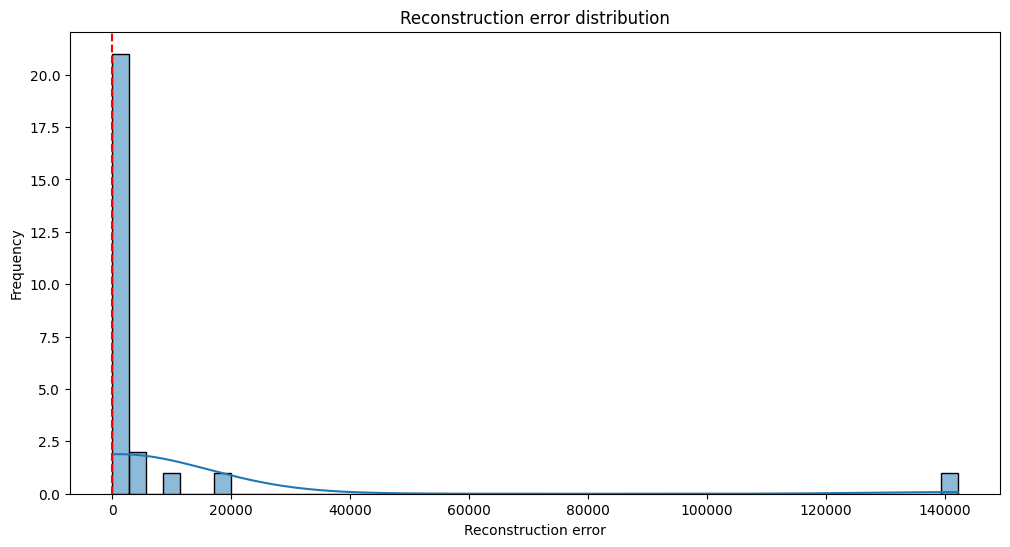

Anomaly threshold: 0.25542372465133667


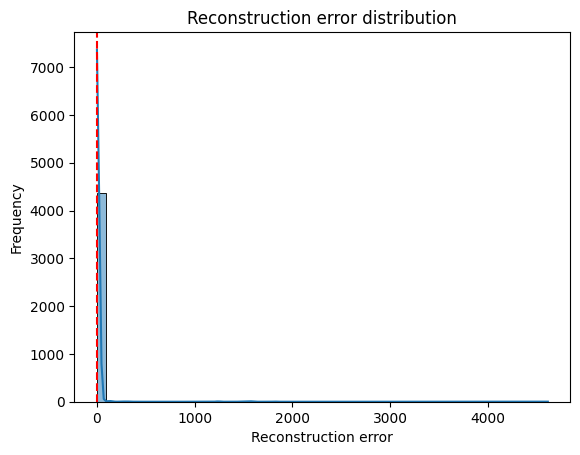

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(mse_test_df['reconstruction_error'], bins=50, kde=True)
plt.title('Reconstruction error distribution')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')


threshold = np.percentile(mse_train_df['reconstruction_error'], 80)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.show() 
print(f"Anomaly threshold: {threshold}")

sns.histplot(mse_train_df['reconstruction_error'], bins=50, kde=True)
plt.title('Reconstruction error distribution')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.show() 



In [45]:
import pandas as pd
import numpy as np

# Set the file paths
folder_path = your_path + '6.Active Data/2023/Test Data/'
# Get file in the folder
files = os.listdir(folder_path)
# MAC issue
files = [f for f in files if f != '.DS_Store']
file_name_test = files[0][:-4]

t_data_path = your_path + '3.Cash_Risk/' + file_name_test +'_Cash_Risk.csv' # THIS IS THE ORIGINAL TEST DATA 
t_data_scaled_path = your_path + '4.Scaled/' + file_name_test + '_Scaled.csv' # THIS IS THE SCALED TEST DATA

# Load new trade data from CSV (both processed and original)
t_data_scaled = pd.read_csv(t_data_scaled_path)
t_data = pd.read_csv(t_data_path)

# Determine whether each trade is an outlier or not
outlier_indices = mse_test_df[mse_test_df['reconstruction_error'] > threshold].index

# Filter the outlier trades from the original data using the outlier indices
outlier_trades_original = t_data.iloc[outlier_indices]

# Save the outlier trades to a CSV file in the original format
outlier_file_path = your_path + '5.Outliers/' + 'Outlier_IRS_test.csv'
outlier_trades_original.to_csv(outlier_file_path, index=False)

print('Number of outlier trades: '+str(len(outlier_trades_original)))
print('See trades in directory: '+outlier_file_path)

Number of outlier trades: 16
See trades in directory: C:/Users/gusta/Documents/KTH/TriOptima/trioptima/trioptima/5.Outliers/Outlier_IRS_test.csv
